In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('train.csv')

In [12]:
df

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [108]:
# checking if any null values
df.isna().sum()

x    0
y    0
dtype: int64

In [23]:
df.dropna(inplace=True)

In [24]:
df

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

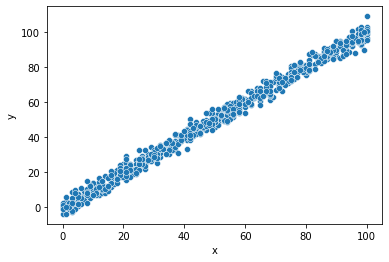

In [109]:
ax = sns.scatterplot('x', 'y', data=df)
ax

In [310]:
m = df.shape[0]
X = np.hstack((np.ones((m,1)), df.x.values.reshape(-1,1)))
y = np.array(df.y.values).reshape(-1,1)
theta = np.zeros(shape=(X.shape[1], 1))
num_iter = 1000
alpha = 0.00001

In [311]:
def compute_cost(X, y, theta):
    m = y.shape[0]
    h = X.dot(theta)
    j = (1/(2*m)) * (np.sum((h-y)**2))
    return j

In [312]:
cost = compute_cost(X, y, theta)
cost

1670.0624130893364

In [313]:
def gradientDescent(X, y, theta, alpha, num_iter):
    m = y.shape[0]
    j_history = np.zeros(shape=(num_iter, 1))
    for i in range(0, num_iter):
        h = X.dot(theta)
        diff_h = h - y
        delta = (1/m) * (diff_h.T.dot(X))
        theta = theta - (alpha * delta.T)
        j_history[i] = compute_cost(X, y, theta)
    return theta, j_history


In [314]:
opt_theta, costs = gradientDescent(X, y, theta, alpha, num_iter)
opt_theta

array([[0.01465811],
       [0.99882975]])

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


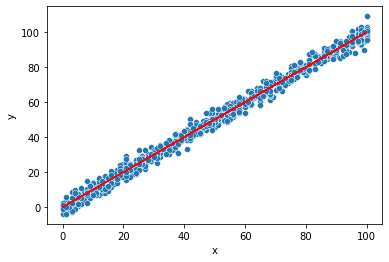

In [315]:
ax = sns.scatterplot('x', 'y', data=df)
plt.plot(X[:,1], X.dot(opt_theta), color='r')

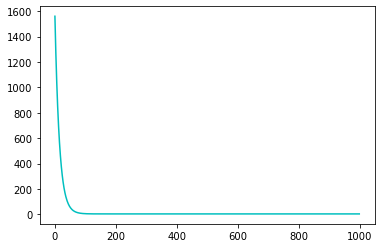

In [316]:
# cost_function

plt.plot(range(len(costs)), costs, color='c')

In [317]:
y_pred = opt_theta[0] + (opt_theta[1] * df.x.values.reshape(-1,1))

In [318]:
y_pred

array([[2.39865722e+01],
       [4.99561457e+01],
       [1.49971044e+01],
       [3.79701887e+01],
       [8.69128466e+01],
       [3.59725292e+01],
       [1.20006151e+01],
       [8.09198681e+01],
       [2.49854019e+01],
       [5.00880687e+00],
       [1.59959342e+01],
       [1.59959342e+01],
       [2.39865722e+01],
       [3.89690185e+01],
       [5.39514647e+01],
       [5.99444433e+01],
       [2.59842317e+01],
       [7.29292300e+01],
       [2.89807209e+01],
       [3.09783804e+01],
       [6.79350813e+01],
       [8.69128466e+01],
       [5.79467838e+01],
       [5.39514647e+01],
       [8.39163573e+01],
       [5.79467838e+01],
       [4.89573160e+01],
       [1.99912532e+01],
       [8.99093358e+01],
       [4.79584862e+01],
       [4.00997712e+00],
       [2.49854019e+01],
       [4.19655077e+01],
       [1.46581118e-02],
       [5.99444433e+01],
       [9.29058251e+01],
       [3.89690185e+01],
       [7.00646638e+00],
       [2.09900829e+01],
       [6.79350813e+01],


In [319]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(df.x.values.reshape(-1,1), df.y.values.reshape(-1,1))
lr.coef_, lr.intercept_

(array([[1.00065638]]), array([-0.10726546]))

In [320]:
y_pred = lr.predict(df.x.values.reshape(-1,1))

In [321]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [322]:
mse = mean_squared_error(y, y_pred)
mse

7.867752733487686

In [323]:
r2error = r2_score(y, y_pred)
r2error

0.9907015319025518

In [324]:
mae = mean_absolute_error(y, y_pred)
mae

2.2271519536455577

In [325]:
costs[-1]

array([3.93574014])